<a href="https://colab.research.google.com/github/Abdulhay004/my_paypal/blob/main/my_paypal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
class My_PayPal:
  def __init__(self, data):
    self.data = pd.read_csv(data)
  
  # head of dataset
  def data_head(self):
    return self.data
 
  # Return of "class" and "amount" columns
  def return_of_amount_and_class_columns(self):
    columns = self.data[['Amount', 'Class']]
    return columns

  # HISTOGRAMS, histogram of the first 10 columns
  def print_histograms(self):
    data = self.data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']]
    data.hist(figsize=(20,10), color="green")
    plt.show()

  # information about the columns and rows of the data set
  def data_shape(self):
    shape = self.data.shape
    rows = shape[0]
    columns = shape[1]
    print('The dataset consists of {} columns \nThe data set consists of {} rows'.format(columns, rows))

  # CLASS column, accounting information about the class column
  def about_class_column(self):
    data = self.data
    rows = data.Class.size
    one = data[data.Class == 1].Class.size
    zero = data[data.Class == 0].Class.size
    share_of_one = f"{round(one/(rows/100), 2)}%"
    share_of_zero = f"{round(zero/(rows/100), 2)}%"
    print("Class")
    columns = pd.DataFrame(columns = ["Name", "Total", "Share"])
    columns["Name"] = ["zeros", "ones"]
    columns["Total"] = [zero, one]
    columns["Share"] = [share_of_zero, share_of_one]
    print( columns )
  
  # SUM OF DATA, a mathematical calculation of all the columns in the data set
  def data_sum(self):
    return self.data.sum() 
  
  # INFO AND ISNULL OF DATASET, data set information and null checks
  def data_info(self):
    data = self.data
    print("Infos of dataset:\n")
    null = data.isnull().sum()
    info = data.info()
    columns = pd.DataFrame(columns = ["Nulls of data"])
    columns["Nulls of data"] = null
    return columns

  # CORRELATION MATRIX, correlation of some desired columns in the data set
  def correlation_matrix(self):
    data = self.data[['V1', 'V3','V7', 'V10','V12', 'V14', 'V16', 'V17', 'V18']]
    corr = data.corr()
    plt.subplots(figsize=(30,10))
    sns.heatmap(corr,annot=True)
  
  # PREDICTION part
  def my_paypal_fit_model_prediction(self):
    X = self.data[['V1', 'V3','V7', 'V10',
            'V12', 'V14', 'V16', 
            'V17', 'V18']]
    y = self.data['Class']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
    models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(), 
              "DecisionTreeRegressor":DecisionTreeRegressor(), "LGBMRegressor":LGBMRegressor(n_estimators=1000)}
    print("Models accuracy:")
    for key, model in models.items():
      model.fit(x_train,y_train)
      y_pred = model.predict(x_test)
      print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
  

  
  # CUSTOMER PROFILES
  def generate_customer_profiles_table(self, n_customers = 5, random_state = 0):
    lst = []
    for i in self.data.index:
      lst.append(i)
    self.data["CUSTOMER_ID"] = lst
    new_column_of_data = self.data

    new_data = new_column_of_data[['CUSTOMER_ID', 'V1', 'V2', 'V4', 'V5', 'V6']]
    new_data.rename(columns = {'V1':'x_customer_id'}, inplace = True)
    new_data.rename(columns = {'V2':'y_customer_id'}, inplace = True)
    new_data.rename(columns = {'V4':'mean_amount'}, inplace = True)
    new_data.rename(columns = {'V5':'std_amount'}, inplace = True)
    new_data.rename(columns = {'V6':'mean_nb_tx_per_day'}, inplace = True)
    data = abs(new_data[:n_customers])
    data[['x_customer_id', 'y_customer_id', 'mean_amount', 'std_amount', 'mean_nb_tx_per_day']] = data[['x_customer_id', 'y_customer_id', 'mean_amount', 'std_amount', 'mean_nb_tx_per_day']] * 100
    return data
  
  # TERMINAL PROFILES
  def generate_terminal_profiles_table(self, n_terminals = 5, random_state = 0):
    lst = []
    for i in self.data.index:
      lst.append(i)
    self.data["TERMINAL_ID"] = lst
    new_column_of_data = self.data

    new_data = new_column_of_data[['TERMINAL_ID', 'V10', 'V11']]
    new_data.rename(columns = {'V10':'x_terminal_id'}, inplace = True)
    new_data.rename(columns = {'V11':'y_terminal_id'}, inplace = True)   
    data = abs(new_data[:n_terminals])
    data[['x_terminal_id', 'y_terminal_id']] = data[['x_terminal_id', 'y_terminal_id']] * 100
    return data

url = 'https://storage.googleapis.com/qwasar-public/track-ds/my_paypal_creditcard.csv'
PayPal = My_PayPal(url)

customer_profiles_table = PayPal.generate_customer_profiles_table()
terminal_profiles_table = PayPal.generate_terminal_profiles_table()

In [ ]:
PayPal.data_head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,CUSTOMER_ID,TERMINAL_ID
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3,3
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284802,284802
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284803,284803
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284804,284804
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284805,284805


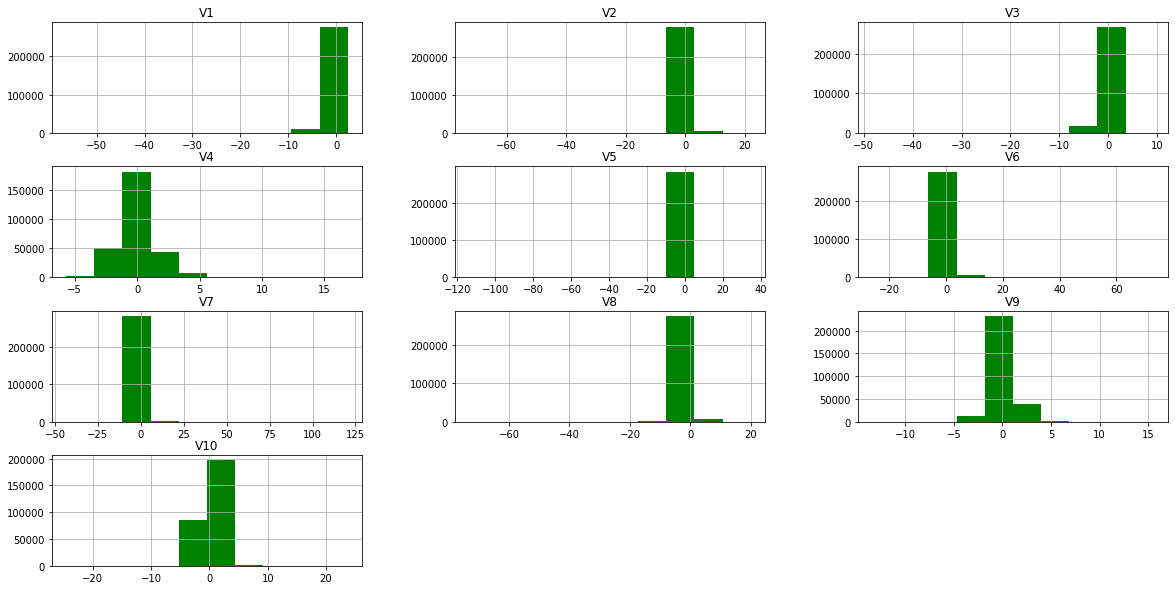

In [ ]:
PayPal.print_histograms()

In [ ]:
PayPal.data_shape()

The dataset consists of 33 columns 
The data set consists of 284807 rows


In [ ]:
PayPal.data_info()

Infos of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         284807 non-null  float64
 1   V1           284807 non-null  float64
 2   V2           284807 non-null  float64
 3   V3           284807 non-null  float64
 4   V4           284807 non-null  float64
 5   V5           284807 non-null  float64
 6   V6           284807 non-null  float64
 7   V7           284807 non-null  float64
 8   V8           284807 non-null  float64
 9   V9           284807 non-null  float64
 10  V10          284807 non-null  float64
 11  V11          284807 non-null  float64
 12  V12          284807 non-null  float64
 13  V13          284807 non-null  float64
 14  V14          284807 non-null  float64
 15  V15          284807 non-null  float64
 16  V16          284807 non-null  float64
 17  V17          284807 non-null  float64
 18  V18  

,Nulls of data
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
PayPal.data_sum()

Time           2.700365e+10
V1             3.327614e-10
V2             9.731593e-11
V3            -3.929017e-10
V4             5.907168e-10
V5             2.735305e-10
V6             4.235972e-10
V7            -1.582521e-10
V8             3.456080e-11
V9            -6.853398e-10
V10            6.376979e-10
V11            4.765752e-10
V12           -3.551577e-10
V13            2.332570e-10
V14            3.438458e-10
V15            1.391982e-09
V16            4.094716e-10
V17           -1.074341e-10
V18            2.723937e-10
V19            2.961755e-10
V20            1.824532e-10
V21            4.710898e-11
V22           -1.016360e-10
V23            7.344170e-11
V24            1.274017e-09
V25            1.521130e-10
V26            4.794547e-10
V27           -1.042419e-10
V28           -3.495693e-11
Amount         2.516259e+07
Class          4.920000e+02
CUSTOMER_ID    4.055737e+10
TERMINAL_ID    4.055737e+10
dtype: float64

In [ ]:
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,135.980713,7.278117,137.815522,33.832077,46.238778
1,1,119.185711,26.615071,44.815408,6.001765,8.236081
2,2,135.835406,134.016307,37.977959,50.319813,180.049938
3,3,96.627171,18.522601,86.329128,1.030888,124.720317
4,4,115.823309,87.773675,40.303393,40.719338,9.592146


In [ ]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,9.079417,55.159953
1,1,16.697441,161.272666
2,2,20.764287,62.450146
3,3,5.495192,22.648726
4,4,75.307443,82.284288


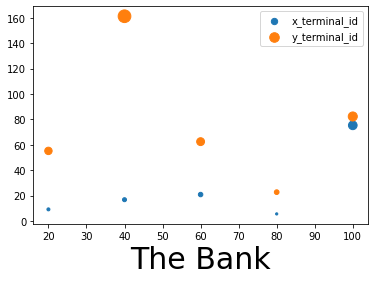

In [ ]:
# You can learn how far the terminals are through this view that the terminals are
def terminals_available_to_customer_fig(data):
  x1 = data['x_terminal_id']
  y1 = data['y_terminal_id']
  size1 = [9, 16, 20, 5, 75]
  size2 = [55, 161, 62, 22, 82]
  x =  [20,40,60,80,100]
  plt.scatter(x, x1, s = size1)
  plt.scatter(x,y1, s = size2)
 
  plt.legend(["x_terminal_id" , "y_terminal_id"])
  plt.xlabel("The Bank", fontsize = 30)
  plt.show()

terminals_available_to_customer_fig(terminal_profiles_table)

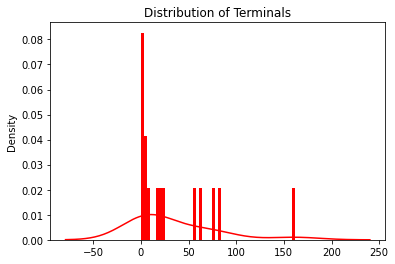

In [ ]:
# Distribution of Terminal  profiles
def my_distribution_amount(data):
  plt.title("Distribution of Terminals")
  ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
 
  plt.show()
my_distribution_amount(terminal_profiles_table)

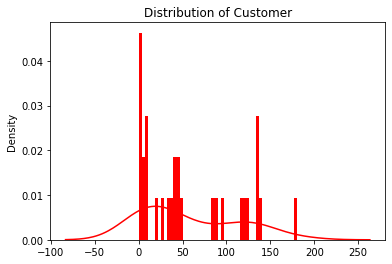

In [ ]:
# Distribution of customer  profiles
def my_distribution_amount_customers(data):
  plt.title("Distribution of Customer")
  ax = sns.distplot(data,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
 
  plt.show()
my_distribution_amount_customers(customer_profiles_table)

In [ ]:
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,135.980713,7.278117,137.815522,33.832077,46.238778,None
1,1,119.185711,26.615071,44.815408,6.001765,8.236081,None
2,2,135.835406,134.016307,37.977959,50.319813,180.049938,None
3,3,96.627171,18.522601,86.329128,1.030888,124.720317,None
4,4,115.823309,87.773675,40.303393,40.719338,9.592146,None


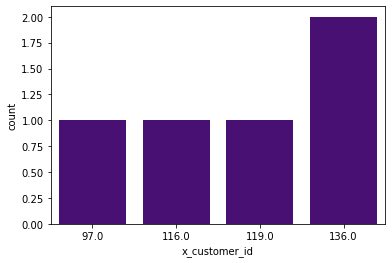

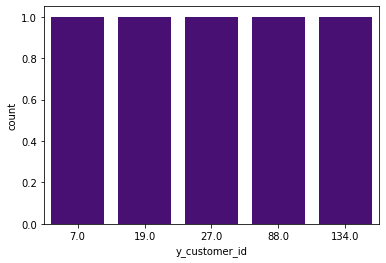

In [ ]:
# Distribution of customer  profiles
def n(data):
  # plt.title("Distribution of Customer")
  x_cust = round(data["x_customer_id"])
  y_cust = round(data["y_customer_id"])
  ax = sns.countplot(x=x_cust, data=data,color='indigo')
  plt.show()
  ax = sns.countplot(x=y_cust, data=data,color='indigo')
  plt.show()
n(customer_profiles_table)

In [ ]:
PayPal.about_class_column()

Class
    Name   Total   Share
0  zeros  284315  99.83%
1   ones     492   0.17%


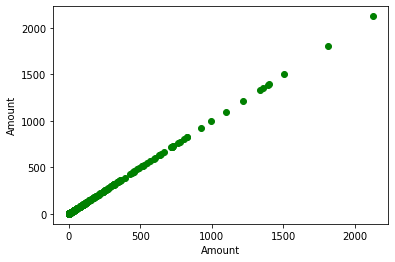

In [ ]:
# This function ensures the amount of money transfers of fraudulent services
def fraud_and_quantity(data):
  amount = data.Amount
  plt.scatter(amount, amount, color = "green")
  plt.xlabel("Amount")
  plt.ylabel("Amount")
  plt.show()



amound_and_class = PayPal.return_of_amount_and_class_columns()
class_1 = amound_and_class[amound_and_class.Class == 1]
fraud_and_quantity(class_1)

In [ ]:
PayPal.my_paypal_fit_model_prediction()

Models accuracy:
KNeighborsRegressor: 77%
LinearRegression: 50%
DecisionTreeRegressor: 65%
LGBMRegressor: 69%
